In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)

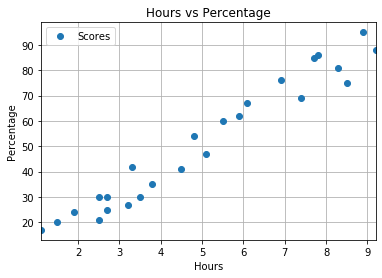

In [3]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.grid()
plt.show()

In [4]:
x = df['Hours']
y = df['Scores']
x = x.to_numpy()
y = y.to_numpy()
x = x.reshape(-1,1)
y = y.reshape(-1,1)
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Linear Regression

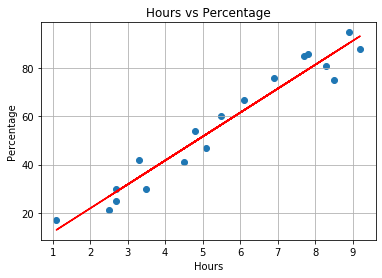

In [5]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()  
lr.fit(x_train, y_train)

plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train), color = 'red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.grid()
plt.show()

# Polynomial Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 3)
x_poly=pf.fit_transform(x_train)
pf.fit(x_poly,y_train)

lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y_train)

LinearRegression()

# Error Finding

In [7]:
#Since the value of mean squared error over polynomical regression is less it is more suitable for degree 3
y_pred = lr.predict(x_test)
y_pred_pr = lin_reg_2.predict(pf.fit_transform(x_test))

from sklearn.metrics import mean_absolute_error as mse
error = mse(y_test, y_pred)
error2 = mse(y_test, y_pred_pr)
print('Linear Regression:' , error)
print('Polynomial Regression:', error2)

Linear Regression: 4.130879918502482
Polynomial Regression: 4.092101304314399


# Predicting Value

In [8]:
hrs = [9.25]
predicted_score = lin_reg_2.predict(pf.fit_transform([hrs]))
print('Predicted Score:' ,predicted_score[0][0])

Predicted Score: 87.99938923607331
